![](files/images/EscUpmPolit_p.gif "UPM")

# Course Notes for Learning Intelligent Systems

Department of Telematic Engineering Systems, Universidad Politécnica de Madrid, ©  Carlos A. Iglesias

## [Introduction to Machine Learning](2_0_0_Intro_ML.ipynb)

# Table of Contents

* [Advanced Visualisation](#Advanced-Visualisation)
* [Install seaborn](#Install-seaborn)
* [Transform Data into Dataframe](#Transform-Data-into-Dataframe)
* [Visualisation with seaborn](#Visualisation-with-seaborn)
* [References](#References)


# Advanced Visualisation

In the previous notebook we developed plots with the [matplotlib](http://matplotlib.org/) plotting library.

This notebook introduces another plotting library, [**seaborn**](https://stanford.edu/~mwaskom/software/seaborn/),  which provides advanced facilities for data visualization.

*Seaborn* is a library for making attractive and informative statistical graphics in Python. It is built on top of *matplotlib* and tightly integrated with the *PyData* stack, including support for *numpy* and *pandas* data structures and statistical routines from *scipy* and *statsmodels*.

*Seaborn* requires its input to be *DataFrames* (a structure created with the library *pandas*).

## Install seaborn

You should install the SeaBorn package. Use `conda install seaborn`.

## Transform Data into Dataframe

*Seaborn* requires that data is represented as a *DataFrame* object from the library *pandas*. 

A *DataFrame* is a 2-dimensional labeled data structure with columns of potentially different types. We will not go into the details of DataFrames in this session.

In [ ]:
from pandas import DataFrame
from sklearn import datasets


# iris data set from scikit learn (it is a Bunch object)
iris = datasets.load_iris()

# transform into dataframe
iris_df = DataFrame(iris.data)
iris_df.columns = iris.feature_names

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_df['species'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Visualisation with seaborn

The following examples are taken from [a kaggle tutorial](https://www.kaggle.com/benhamner/d/uciml/iris/python-data-visualizations/notebook) and [the seaborn tutorial](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html).

To plot multiple pairwise bivariate distributions in a dataset, you can use the *pairplot()* function and *PairGrid()*.

## Scatterplot

A **scatterplot matrix** (*matriz de diagramas de dispersión*) presents every pairwise relationship between a set of variables.

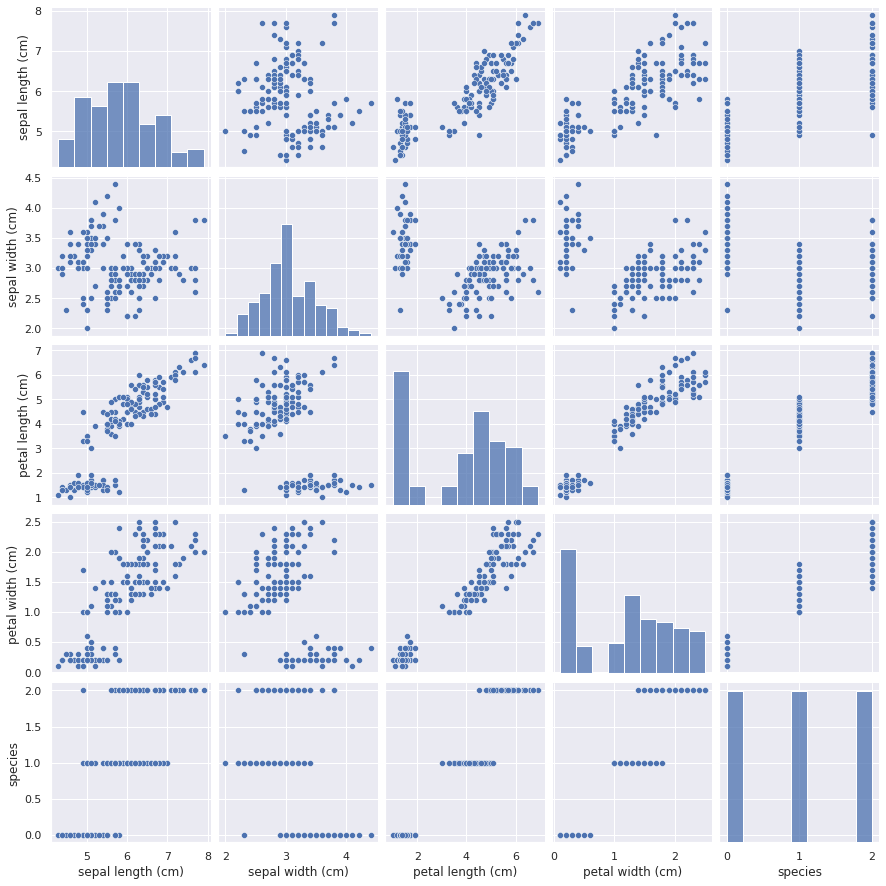

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)

# if matplotlib is not set inline, you will not see plots
%matplotlib inline 

sns.pairplot(iris_df)


## PairGrid

**PairGrid** allows you to quickly draw a grid of small subplots using the same plot type to visualize data in each. In a PairGrid, each row and column is assigned to a different variable, so the resulting plot shows each pairwise relationship in the dataset. This style of plot is sometimes called a “scatterplot matrix”, as this is the most common way to show each relationship

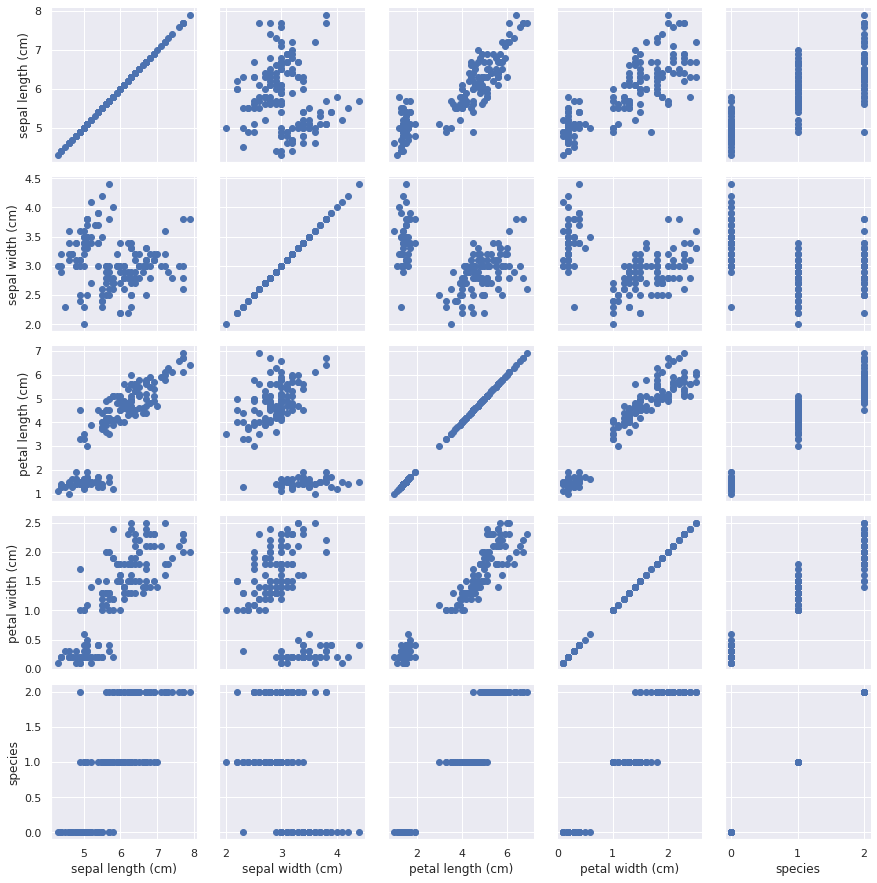

In [ ]:
# PairGrid
g = sns.PairGrid(iris_df)
g.map(plt.scatter);

A very common way to use this plot colors the observations by a separate categorical variable. For example, the iris dataset has four measurements for each of the three different species of iris flowers.

We are going to color each class, so that we can easily identify **clustering** and **linear relationships**.

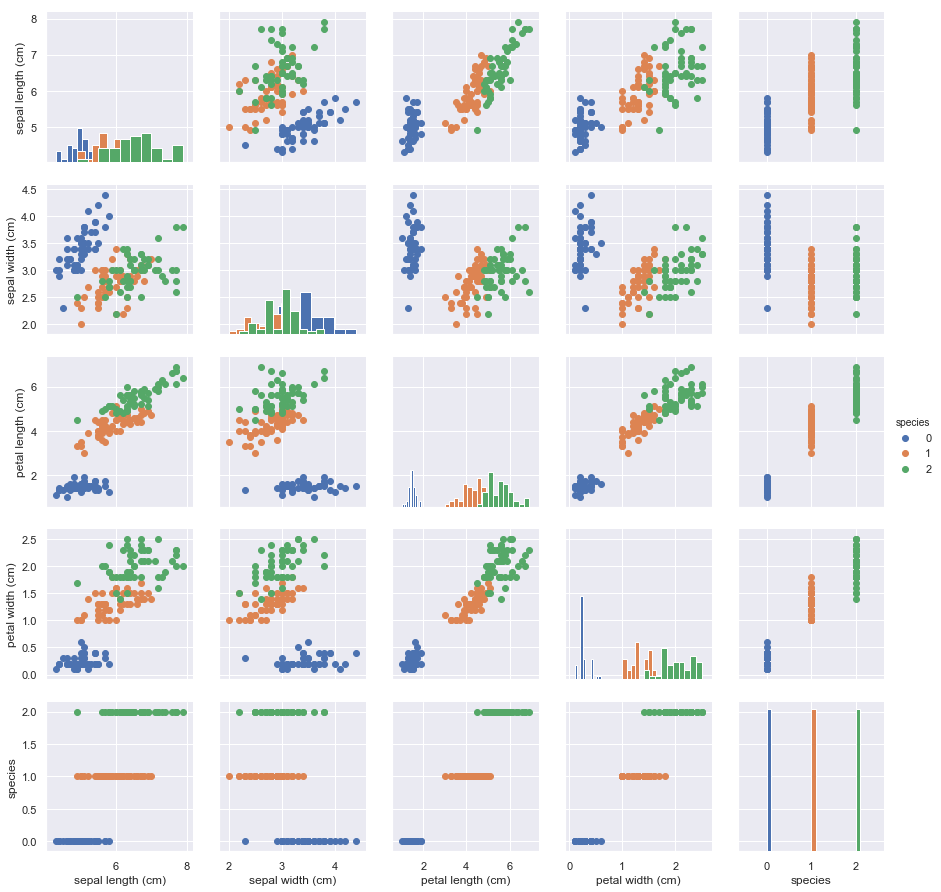

In [ ]:
g = sns.PairGrid(iris_df, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
#names = {i: name for i,name in enumerate(iris.target_names)}
#g.add_legend(legend_data=names)
g.add_legend()

By default every numeric column in the dataset is used, but you can focus on particular relationships if you want.

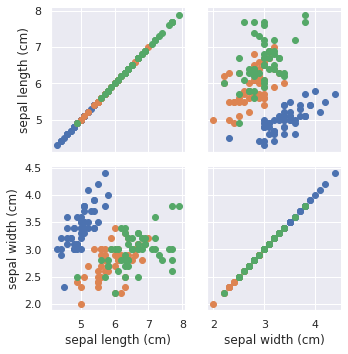

In [ ]:
g = sns.PairGrid(iris_df, vars=['sepal length (cm)', 'sepal width (cm)'], hue="species")
g.map(plt.scatter);

It’s also possible to use a different function in the upper and lower triangles to emphasize different aspects of the relationship.

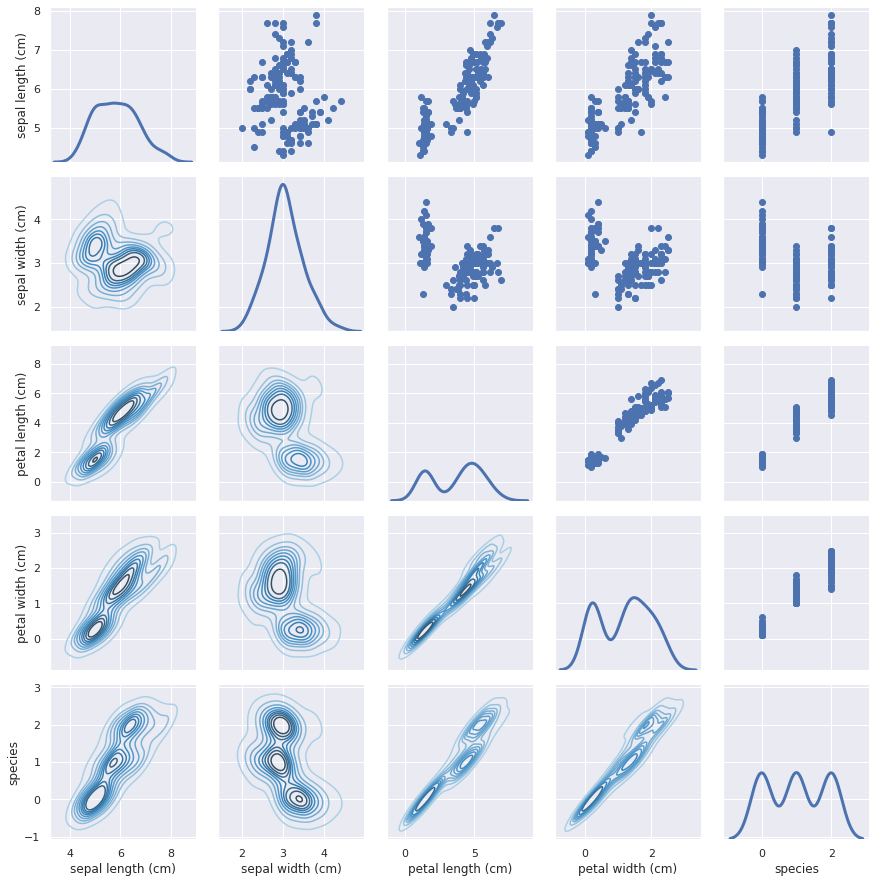

In [ ]:
g = sns.PairGrid(iris_df)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.kdeplot, lw=3, legend=True);

## Pairplot

PairGrid is flexible, but to take a quick look at a dataset, it may be easier to use pairplot(). This function uses scatterplots and histograms by default, although a few other kinds will be added (currently, you can also plot regression plots on the off-diagonals and KDEs on the diagonal).

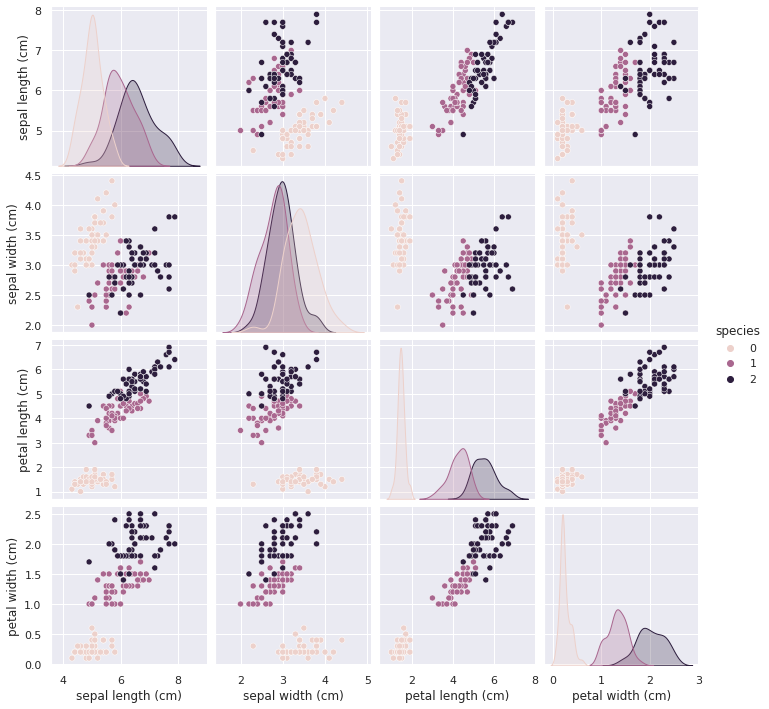

In [ ]:
sns.pairplot(iris_df, hue="species", height=2.5);

You can also control the aesthetics of the plot with keyword arguments, and it returns the PairGrid instance for further tweaking.

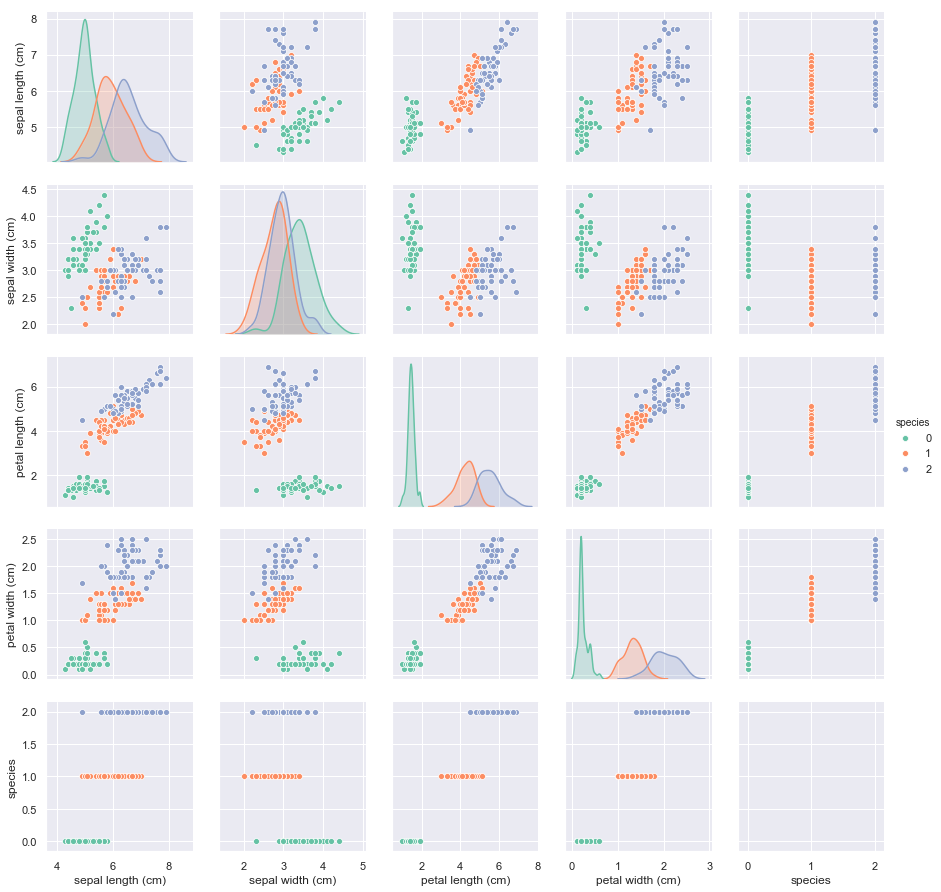

In [ ]:
g = sns.pairplot(iris_df, hue="species", palette="Set2")

## Violin Plots (boxplot)

[**Box plots** or **boxplot** ](https://en.wikipedia.org/wiki/Box_plot) (*diagramas de caja*) are a convenient way of graphically depicting groups of numerical data through their quartiles.

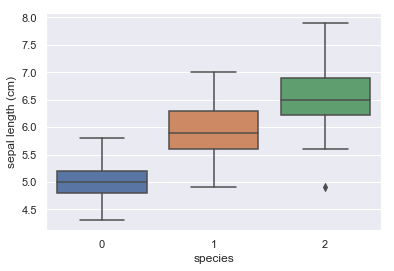

In [ ]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="species", y="sepal length (cm)", data=iris_df)

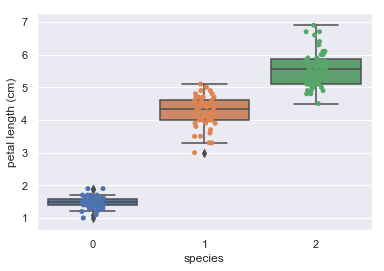

In [ ]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="species", y="petal length (cm)", data=iris_df)
ax = sns.stripplot(x="species", y="petal length (cm)", data=iris_df, jitter=True, edgecolor="gray")

[**Violin plots**](https://en.wikipedia.org/wiki/Violin_plot) (*diagramas de violín*)  are a method of plotting numeric data. A violin plot is a box plot with a rotated kernel density plot on each side.  A violin plot is just a histogram (or more often a smoothed variant like a kernel density) turned on its side and mirrored.

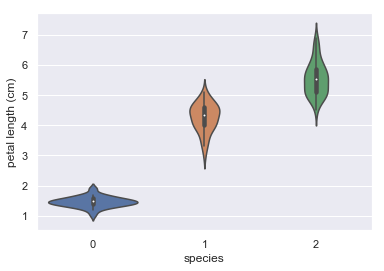

In [ ]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="species", y="petal length (cm)", data=iris_df, size=6)

## Kernel Density Estimation (KDE)

Another useful representation is the [Kernel density estimation (KDE)](https://en.wikipedia.org/wiki/Kernel_density_estimation) plot. KDE is a non-parametric way to estimate the probability density function of a random variable. The kdeplot represents the shape of a distribution. Like the histogram, the KDE plots encodes the density of observations on one axis with height along the other axis:

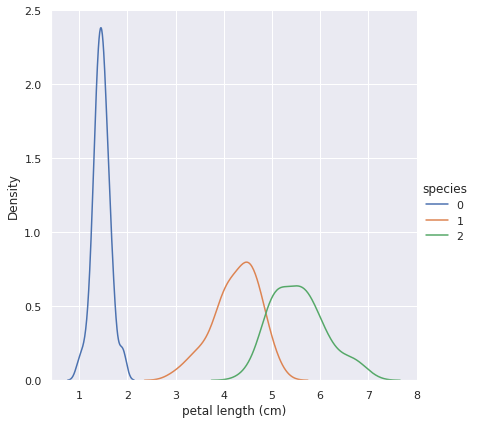

In [ ]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris_df, hue="species", height=6) \
   .map(sns.kdeplot, "petal length (cm)") \
   .add_legend()

# Choosing the right visualisation

Depending on the data, we can choose which visualisation suits better. the following [diagram](http://www.labnol.org/software/find-right-chart-type-for-your-data/6523/) guides this selection.


![](files/images/data-chart-type.png "Graphs")

## References

* [Feature selection](http://scikit-learn.org/stable/modules/feature_selection.html)
* [Classification probability](http://scikit-learn.org/stable/auto_examples/classification/plot_classification_probability.html)
* [Mastering Pandas](http://proquest.safaribooksonline.com/book/programming/python/9781783981960), Femi Anthony, Packt Publishing, 2015.
* [Matplotlib web page](http://matplotlib.org/index.html)
* [Using matlibplot in IPython](http://ipython.readthedocs.org/en/stable/interactive/plotting.html)
* [Seaborn Tutorial](https://stanford.edu/~mwaskom/software/seaborn/tutorial.html)
* [Iris dataset visualisation notebook](https://www.kaggle.com/benhamner/d/uciml/iris/python-data-visualizations/notebook)
* [Tutorial plotting with Seaborn](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html)
* [Choose the Right Chart Type for your Data](http://www.labnol.org/software/find-right-chart-type-for-your-data/6523/)

## Licence
The notebook is freely licensed under under the [Creative Commons Attribution Share-Alike license](https://creativecommons.org/licenses/by/2.0/).  

© Carlos A. Iglesias, Universidad Politécnica de Madrid.